In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Find_outliers.csv')

In [ ]:
df

,Unnamed: 0,listing_type,listing_first_date,days_on_market,dealer_city,dealer_postal_code,stock_type,vehicle_id,vin,mileage,...,style,certified,exterior_color_category,interior_color_category,wheelbase_from_vin,drivetrain_from_vin,engine_from_vin,transmission_from_vin,fuel_type_from_vin,listing_dropoff_date
0,0,Active,2024-07-22,9,Edmonton,T5S 1Y8,USED,79126,1G1FP2189HN139203,230860,...,2D Coupe,0,blue,NaN,0.0,RWD,5.7L V8 TBI,A,Gas,2024-07-24
1,1,Sold,2024-07-20,4,Edmonton,T6V 1H4,USED,72277,1C3BF66P0JW113318,48905,...,4D Sedan,0,blue,NaN,0.0,RWD,5.2L V8,A,Gas,2024-07-24
2,2,Active,2024-06-07,54,Edmonton,T6H 1B7,USED,66755,1G6CD5157K4364083,174640,...,4D Sedan,0,pink,NaN,0.0,FWD,4.5L V8 DI,A,Gas,2024-07-24
3,3,Active,2023-08-28,338,Edmonton,T6H 1B7,USED,66755,1G6CD5157K4364083,174640,...,4D Sedan,0,pink,NaN,0.0,FWD,4.5L V8 DI,A,Gas,2024-07-24
4,4,Active,2024-07-21,10,Edmonton,T5S 1Y8,USED,72366,1G1FP2185K2723911,288000,...,2D Coupe,0,pink,NaN,0.0,RWD,5.7L V8 TBI,A,Gas,2024-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143962,145109,Sold,2024-03-05,99,Edmonton,T6X 1A1,NEW,574294,YV4H60CF6R1219373,30,...,4D Utility AWD,0,gray,"gray,black",2984.5,AWD,2.0L I-4 DI PHEV T/C,A,PHEV,2024-06-12
143963,145110,Sold,2024-03-05,96,Edmonton,T6X 1A1,NEW,574294,YV4H60CF9R1197899,30,...,4D Utility AWD,0,gray,"gray,black",2984.5,AWD,2.0L I-4 DI PHEV T/C,A,PHEV,2024-06-09
143964,145111,Sold,2024-05-06,22,Edmonton,T6X 1A1,USED,574294,YV4H60CF0R1160563,2454,...,4D Utility AWD,0,black,"gray,black",2984.5,AWD,2.0L I-4 DI PHEV T/C,A,PHEV,2024-05-28
143965,145112,Sold,2024-03-20,71,Edmonton,T6X 1A1,NEW,574294,YV4H60CF0R1160563,2454,...,4D Utility AWD,0,black,"gray,black",2984.5,AWD,2.0L I-4 DI PHEV T/C,A,PHEV,2024-05-30


In [ ]:
df = df.drop('Unnamed: 0',axis = 1)

In [ ]:
df

,listing_type,listing_first_date,days_on_market,dealer_city,dealer_postal_code,stock_type,vehicle_id,vin,mileage,price,...,style,certified,exterior_color_category,interior_color_category,wheelbase_from_vin,drivetrain_from_vin,engine_from_vin,transmission_from_vin,fuel_type_from_vin,listing_dropoff_date
0,Active,2024-07-22,9,Edmonton,T5S 1Y8,USED,79126,1G1FP2189HN139203,230860,11500,...,2D Coupe,0,blue,NaN,0.0,RWD,5.7L V8 TBI,A,Gas,2024-07-24
1,Sold,2024-07-20,4,Edmonton,T6V 1H4,USED,72277,1C3BF66P0JW113318,48905,8700,...,4D Sedan,0,blue,NaN,0.0,RWD,5.2L V8,A,Gas,2024-07-24
2,Active,2024-06-07,54,Edmonton,T6H 1B7,USED,66755,1G6CD5157K4364083,174640,6000,...,4D Sedan,0,pink,NaN,0.0,FWD,4.5L V8 DI,A,Gas,2024-07-24
3,Active,2023-08-28,338,Edmonton,T6H 1B7,USED,66755,1G6CD5157K4364083,174640,6000,...,4D Sedan,0,pink,NaN,0.0,FWD,4.5L V8 DI,A,Gas,2024-07-24
4,Active,2024-07-21,10,Edmonton,T5S 1Y8,USED,72366,1G1FP2185K2723911,288000,8500,...,2D Coupe,0,pink,NaN,0.0,RWD,5.7L V8 TBI,A,Gas,2024-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91197,Sold,2024-05-23,20,Sherwood Park,T8H 0R5,NEW,572029,2GC4YUEY2R1244847,17,114969,...,Crew Cab SWB 4WD,0,gray,black,4037.0,4WD,6.6L V8 DI OHV TDsl,A,Diesel,2024-06-12
91198,Sold,2024-04-27,75,Sherwood Park,T8H 0R5,NEW,572029,2GC4YUEY6R1235617,15,119614,...,Crew Cab SWB 4WD,0,gray,black,4037.0,4WD,6.6L V8 DI OHV TDsl,A,Diesel,2024-07-11
91199,Sold,2024-01-01,120,Sherwood Park,T8H 0R5,NEW,572052,1GC4YSEY1RF190809,5,79980,...,Crew Cab DRW LWB 4WD,0,white,black,4369.0,4WD,6.6L V8 DI OHV TDsl,A,Diesel,2024-04-30
91200,Sold,2024-01-01,120,Sherwood Park,T8H 0R5,NEW,572052,1GC4YSEY2RF190480,17,79980,...,Crew Cab DRW LWB 4WD,0,white,black,4369.0,4WD,6.6L V8 DI OHV TDsl,A,Diesel,2024-04-30


In [ ]:
df_used = df[df['stock_type'] == 'USED']
df_New = df[df['stock_type'] == 'NEW']

In [ ]:
df_used

,listing_type,listing_first_date,days_on_market,dealer_city,dealer_postal_code,stock_type,vehicle_id,vin,mileage,price,...,style,certified,exterior_color_category,interior_color_category,wheelbase_from_vin,drivetrain_from_vin,engine_from_vin,transmission_from_vin,fuel_type_from_vin,listing_dropoff_date
0,Active,2024-07-22,9,Edmonton,T5S 1Y8,USED,79126,1G1FP2189HN139203,230860,11500,...,2D Coupe,0,blue,NaN,0.0,RWD,5.7L V8 TBI,A,Gas,2024-07-24
1,Sold,2024-07-20,4,Edmonton,T6V 1H4,USED,72277,1C3BF66P0JW113318,48905,8700,...,4D Sedan,0,blue,NaN,0.0,RWD,5.2L V8,A,Gas,2024-07-24
2,Active,2024-06-07,54,Edmonton,T6H 1B7,USED,66755,1G6CD5157K4364083,174640,6000,...,4D Sedan,0,pink,NaN,0.0,FWD,4.5L V8 DI,A,Gas,2024-07-24
3,Active,2023-08-28,338,Edmonton,T6H 1B7,USED,66755,1G6CD5157K4364083,174640,6000,...,4D Sedan,0,pink,NaN,0.0,FWD,4.5L V8 DI,A,Gas,2024-07-24
4,Active,2024-07-21,10,Edmonton,T5S 1Y8,USED,72366,1G1FP2185K2723911,288000,8500,...,2D Coupe,0,pink,NaN,0.0,RWD,5.7L V8 TBI,A,Gas,2024-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91155,Sold,2024-06-06,25,Sherwood Park,T8H 0R5,USED,572049,1GC4YVEY7RF202835,19425,101980,...,Crew Cab SRW LWB 4WD,0,black,black,4369.0,4WD,6.6L V8 DI OHV TDsl,A,Diesel,2024-07-01
91156,Sold,2024-01-11,183,Sherwood Park,T8H 0R5,USED,572049,2GC4YVEYXR1133291,9417,102980,...,Crew Cab SRW LWB 4WD,0,white,black,4369.0,4WD,6.6L V8 DI OHV TDsl,A,Diesel,2024-07-12
91160,Sold,2024-05-05,41,Sherwood Park,T8H 0R5,USED,572031,1GC4YVEY5RF315277,15407,120584,...,Crew Cab SWB 4WD,0,black,black,4037.0,4WD,6.6L V8 DI OHV TDsl,A,Diesel,2024-06-15
91163,Sold,2024-05-23,16,Sherwood Park,T8H 0R5,USED,572050,2GC4YTEY0R1166109,4899,91680,...,Crew Cab DRW LWB 4WD,0,black,black,4369.0,4WD,6.6L V8 DI OHV TDsl,A,Diesel,2024-06-08


In [ ]:
df_New

,listing_type,listing_first_date,days_on_market,dealer_city,dealer_postal_code,stock_type,vehicle_id,vin,mileage,price,...,style,certified,exterior_color_category,interior_color_category,wheelbase_from_vin,drivetrain_from_vin,engine_from_vin,transmission_from_vin,fuel_type_from_vin,listing_dropoff_date
931,Sold,2024-04-30,21,Edmonton,T5E 6M7,NEW,142935,4T1BE46K87U062013,1266,7495,...,4D Sedan,0,silver,"gray,black",109.6,FWD,2.4L I-4 EFI DOHC,A,Gas,2024-05-21
5406,Active,2024-07-16,15,Edmonton,T5V 0C3,NEW,276870,WVWBA7AJ4DW118139,143288,22770,...,2D Hatchback 2.5 at,0,black,black,2578.0,FWD,2.5L I-5 SMPI DOHC,A,Gas,2024-07-15
10755,Sold,2024-07-23,1,Edmonton,T5V 0C3,NEW,371978,1G1ZE5ST0GF291015,80123,0,...,4D Sedan,0,gray,black,2830.0,FWD,1.5L I-4 DI DOHC VVT T/C,A,Gas,2024-07-24
16071,Sold,2024-07-24,3,Edmonton,T5V 0C3,NEW,393899,1GTN2LEC4HZ273793,15,0,...,Reg Cab LWB 4WD,0,gray,black,3378.0,4WD,5.3L V8 DI VVT Flex,A,Gas,2024-07-27
26840,Active,2024-07-20,11,Edmonton,T5V 0C3,NEW,462957,KL4CJESB1KB845981,84017,0,...,4D Utility AWD,0,white,black,2555.0,AWD,1.4L I-4 MFI DOHC T/C,A,Gas,2024-06-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91197,Sold,2024-05-23,20,Sherwood Park,T8H 0R5,NEW,572029,2GC4YUEY2R1244847,17,114969,...,Crew Cab SWB 4WD,0,gray,black,4037.0,4WD,6.6L V8 DI OHV TDsl,A,Diesel,2024-06-12
91198,Sold,2024-04-27,75,Sherwood Park,T8H 0R5,NEW,572029,2GC4YUEY6R1235617,15,119614,...,Crew Cab SWB 4WD,0,gray,black,4037.0,4WD,6.6L V8 DI OHV TDsl,A,Diesel,2024-07-11
91199,Sold,2024-01-01,120,Sherwood Park,T8H 0R5,NEW,572052,1GC4YSEY1RF190809,5,79980,...,Crew Cab DRW LWB 4WD,0,white,black,4369.0,4WD,6.6L V8 DI OHV TDsl,A,Diesel,2024-04-30
91200,Sold,2024-01-01,120,Sherwood Park,T8H 0R5,NEW,572052,1GC4YSEY2RF190480,17,79980,...,Crew Cab DRW LWB 4WD,0,white,black,4369.0,4WD,6.6L V8 DI OHV TDsl,A,Diesel,2024-04-30


<Axes: ylabel='mileage'>

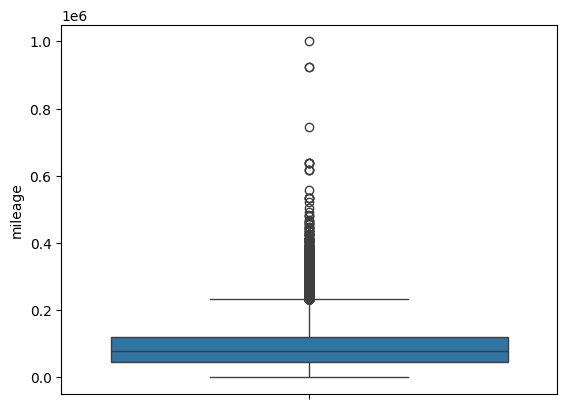

In [ ]:
sns.boxplot(df_used['mileage'])